
<h1>Pandas Tutorial</h1>

(C) Bartosz and Maria Teleńczuk


Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)

In [1]:
%matplotlib inline
import pandas as pd

pd.options.display.max_rows = 8

# Pandas: data analysis in python

 Pandas can be thought of as NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.

## Why do you need pandas?

When working with *tabular or structured data* (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

## Further reading

- the documentation: http://pandas.pydata.org/pandas-docs/stable/
- Wes McKinney's book "Python for Data Analysis"
- lots of tutorials on the internet (search "pandas tutorial" On github or youtube)



## Dataframes

DataFrame: multi-dimensional table of structured, hetermogeneous data, similar to spreadsheet

We will first download the data, **please copy and paste**:

In [2]:
# download data from server and save in a local file
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/btel/2021-uj-python-materials/master/data/countries.csv"
f = urlretrieve(url, filename='countries.csv')

In [3]:
import pandas as pd
countries = pd.read_csv("countries.csv")
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Useful functions

In [4]:
countries.head(n=2)

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris


In [5]:
countries.describe()

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


<div class="alert alert-success">

**Quiz** What is the minimum and maximum population of the given countries.

</div>

### Indexing

#### Indexing columns

get a column

In [6]:
countries['population']

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

select several columns

In [7]:
countries[['population', 'area']]

,population,area
0,11.3,30510
1,64.3,671308
2,81.3,357050
3,16.9,41526
4,64.9,244820


#### Indexing rows

In [8]:
countries.loc[0]

country        Belgium
population        11.3
area             30510
capital       Brussels
Name: 0, dtype: object

#### Two-dimensional indexing

In [9]:
countries.loc[0, "area"]

30510

<div class="alert alert-success">
    <b>EXERCISE</b>: Print the population of Germany
</div>

#### Dataframe index

In [10]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [11]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [12]:
indexed = countries.set_index("country")
indexed

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


#### Predictable indexing with .loc and .iloc

select a row using special `.loc` or `.iloc` attributes:

In [13]:
indexed.loc["Belgium", :]

population        11.3
area             30510
capital       Brussels
Name: Belgium, dtype: object

In [14]:
indexed.loc[["Belgium", "France"], ["area", "population"]]

,area,population
country,,
Belgium,30510,11.3
France,671308,64.3


In [15]:
indexed.iloc[1:3, :]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin


#### Filtering

In [16]:
indexed[indexed['population']> 20]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
United Kingdom,64.9,244820,London


<div class="alert alert-success">
    
**Quiz** Imagine that you get the DataFrame called `dinos` with the following content:


sample | density | weight | species
--- | --- | --- | --
3 | 10 | 11 | Hydrosaurus
1 | 9 | 5 | Diplodocus 
2 | 11 | 2 | Pterodactyl 

try to guess what each of the command will return:

A) `dinos['density']`

B) `dinos.iloc[1, 'species']`

C) `dinos.loc[1, 'species']`

D) `dinos.iloc[1:, 'weight']`

E*) `dinos.loc[1:, 'weight']`
    
</div>

## Calculations

In [17]:
countries['population'] * 1000

0    11300.0
1    64300.0
2    81300.0
3    16900.0
4    64900.0
Name: population, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate how big is the population of each country relative to France
</div>

In [18]:
countries.mean()

population        47.74
area          269042.80
dtype: float64

In [19]:
countries.sum()

country       BelgiumFranceGermanyNetherlandsUnited Kingdom
population                                            238.7
area                                                1345214
capital                  BrusselsParisBerlinAmsterdamLondon
dtype: object

In [20]:
countries.sort_index()

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [21]:
countries.sort_values(by='population')

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
3,Netherlands,16.9,41526,Amsterdam
1,France,64.3,671308,Paris
4,United Kingdom,64.9,244820,London
2,Germany,81.3,357050,Berlin


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the total population of 3 largest countries (area-wise)
</div>

## Plotting

<AxesSubplot:xlabel='country'>

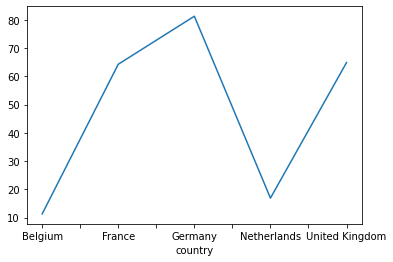

In [22]:
indexed['population'].plot()

<AxesSubplot:xlabel='country'>

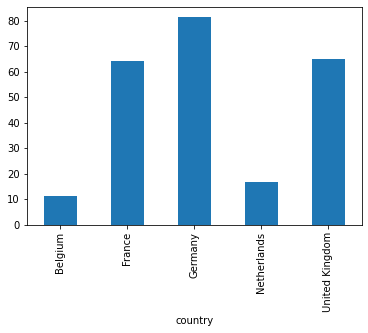

In [23]:
indexed['population'].plot(kind='bar')

<AxesSubplot:xlabel='area', ylabel='population'>

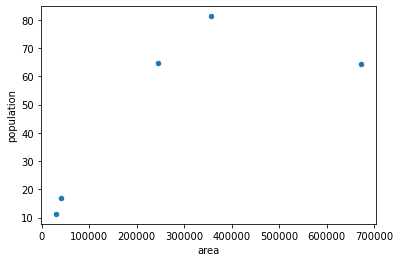

In [24]:
indexed.plot(kind='scatter', x='area', y='population')

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate and plot the population density in each country as a bar plot
</div>

### Styling and customisation

pandas graphs are matplotlib objects:

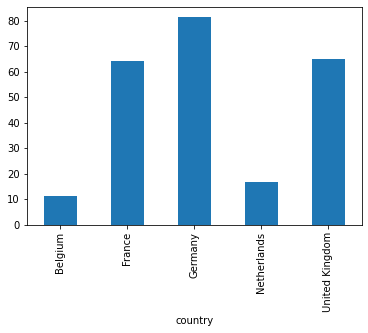

In [25]:
ax = indexed['population'].plot(kind='bar')


In [26]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

(check out our matplotlib [notebook](introduction_to_matplotlib.ipynb) for more infor about matplotlib)

#### Using .plot arguments

you can pass extra arguments to plot that will be forwarded to matplotlib's plot function (such as `color`, `facecolor`, `edgecolor`, `linewidth`):

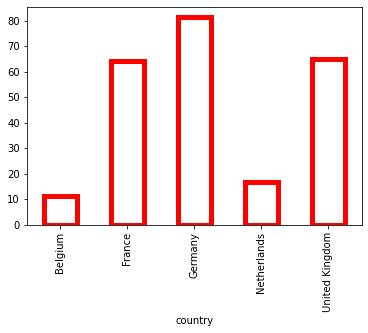

In [27]:
ax = indexed['population'].plot(
    kind='bar',
    facecolor='white',
    edgecolor='red', 
    linewidth=5)

#### Using matploltib functions

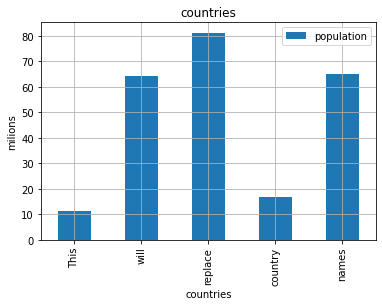

In [28]:
import matplotlib.pyplot as plt

ax = indexed['population'].plot(kind='bar')

# add legend
ax.legend()

# set title
ax.set_title('countries')

# set x, y axes labes
ax.set_xlabel("countries")
ax.set_ylabel("milions")

# replace x-tick labels
ax.set_xticklabels(['This', 'will', 'replace', 'country', 'names'])

# toggle grid
plt.grid()

#### Changing matplotlib style

<AxesSubplot:xlabel='country'>

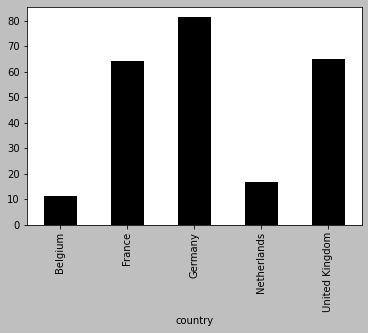

In [29]:
plt.style.use('grayscale')
indexed['population'].plot(kind='bar')

#### Using subplots

You can also use mutliple graphs on one figure:

* using matplotlib directly 

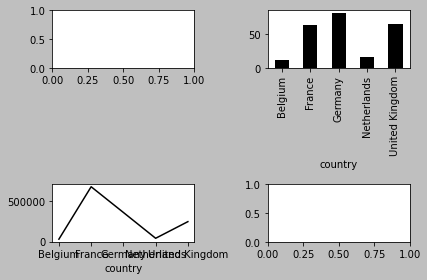

In [30]:
fig, axes = plt.subplots(2, 2)
indexed['population'].plot(kind='bar', ax=axes[0, 1])
indexed['area'].plot(ax=axes[1, 0])

# resize graphs to avoid overlapping labels
plt.tight_layout()

* or use pandas argument (`subplots`)

array([<AxesSubplot:title={'center':'population'}>,
       <AxesSubplot:title={'center':'area'}>], dtype=object)

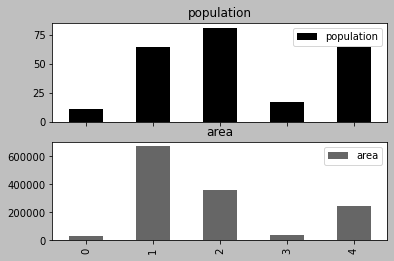

In [31]:
countries.plot(kind='bar', subplots=True)

#### Saving

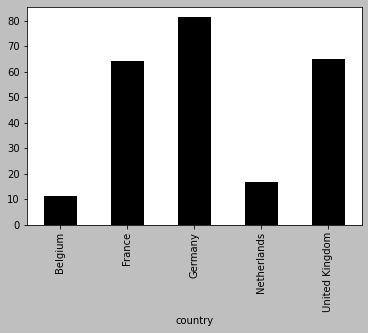

In [32]:
indexed['population'].plot(kind='bar')

# you can save graphs in many different formats
plt.savefig('population.png')
plt.savefig('population.pdf')
plt.savefig('population.jpg')
plt.savefig('population.eps')
plt.savefig('population.svg')

# Working with multiple data sources

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created like a NumPy array:

In [33]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Creating Series from dictionary

It's possible to construct a series directly from a Python dictionary. Let's first define the dictionary of GDP in 2007:

In [34]:
gdp_dict = {
 'France': 30470,
 'Germany': 32170,
 'United Kingdom': 33203,
 'Belgium': 33692,
 'Netherlands': 36797,
 'Albania': 5937}

In [35]:
pd.Series(gdp_dict)

France            30470
Germany           32170
United Kingdom    33203
Belgium           33692
Netherlands       36797
Albania            5937
dtype: int64

Now we construct a `Series` object from the dictionary.

In [36]:
gdp = pd.Series(gdp_dict)
gdp

France            30470
Germany           32170
United Kingdom    33203
Belgium           33692
Netherlands       36797
Albania            5937
dtype: int64

### Automatic alignment

In [37]:
indexed['population'] * gdp

Albania                 NaN
Belgium            380719.6
France            1959221.0
Germany           2615421.0
Netherlands        621869.3
United Kingdom    2154874.7
dtype: float64

## Adding column to a dataset

Most novel information is hidden in **relations** between several data sets. Hardly, ever you will find all relevant information in a single table.

You can add a column to a dataframe, which will be also automatically aligned

In [38]:
indexed["gdp"] = gdp

In [39]:
indexed

,population,area,capital,gdp
country,,,,
Belgium,11.3,30510,Brussels,33692
France,64.3,671308,Paris,30470
Germany,81.3,357050,Berlin,32170
Netherlands,16.9,41526,Amsterdam,36797
United Kingdom,64.9,244820,London,33203


**Note** Albania is missing from the list, because it was not included in our DataFrame with countries

this changed the dataframe **in place**, but you can also create a new dataframe with:

go to [Matplotlib](introduction_to_matplolib.ipynb)